In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from collections import Counter
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [2]:
# 1. Sample generation
classpath = 'lab2dataset/practice_dataframe.xlsx'

usecols = [
    'cat16_city'
    ,'cat7_motivesForEmployeesToWorkBetter'
    , 'num1_12'
    , 'num2_12'
    , 'num3_12']

data = pd.read_excel(classpath, usecols = usecols)

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   cat7_motivesForEmployeesToWorkBetter  981 non-null    object 
 1   cat16_city                            980 non-null    object 
 2   num1_12                               1000 non-null   float64
 3   num2_12                               952 non-null    float64
 4   num3_12                               973 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


cat7_motivesForEmployeesToWorkBetter      cat16_city      num1_12  \
0                      Peer motivation          moscow  -837.687526   
1    Professional growth opportunities  St. Petersburg  1336.388455   
2                      peer motivation  St. Petersburg   869.103465   
3                          Recognition          Moscow    65.909935   
4                          Recognition     Chelyabinsk  1632.011092   

       num2_12     num3_12  
0   844.805675  380.964354  
1   215.923522              
2   706.463138  239.490844  
3   444.392061  265.519349  
4  1208.682281  279.955993

In [4]:
data.cat7_motivesForEmployeesToWorkBetter.unique()

array(['Peer motivation', 'Professional growth opportunities',
       'peer motivation', 'Recognition', 'Friendly work culture',
       'recognition', ' ', '-', nan], dtype=object)

In [5]:
data.cat16_city.unique()

array(['moscow', 'St. Petersburg', 'Moscow', 'Chelyabinsk', 'novosibirsk',
       nan, '-', 'Novosibirsk', ' '], dtype=object)

In [6]:
data['cat7_motivesForEmployeesToWorkBetter'] = data['cat7_motivesForEmployeesToWorkBetter']\
    .replace(
    {'peer motivation': 'Peer motivation',
     'recognition': 'Recognition',
     '-': None,
     ' ': None,
     np.nan: None}
)
data.cat7_motivesForEmployeesToWorkBetter.unique()

array(['Peer motivation', 'Professional growth opportunities',
       'Recognition', 'Friendly work culture', None], dtype=object)

In [7]:
data['cat16_city'] = data['cat16_city']\
    .replace(
    {'moscow': 'Moscow',
     'novosibirsk': 'Novosibirsk',
     '-': None,
     ' ': None,
     np.nan: None}
)
data.cat16_city.unique()

array(['Moscow', 'St. Petersburg', 'Chelyabinsk', 'Novosibirsk', None],
      dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   cat7_motivesForEmployeesToWorkBetter  941 non-null    object 
 1   cat16_city                            942 non-null    object 
 2   num1_12                               1000 non-null   float64
 3   num2_12                               952 non-null    float64
 4   num3_12                               913 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


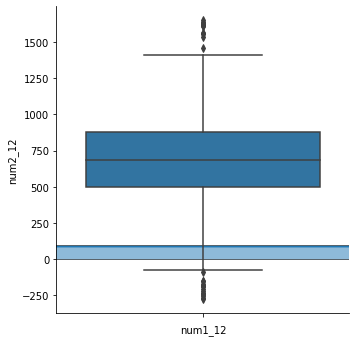

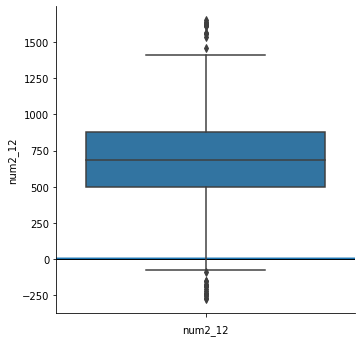

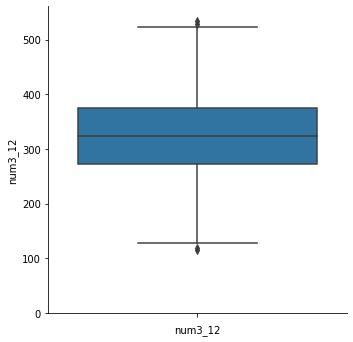

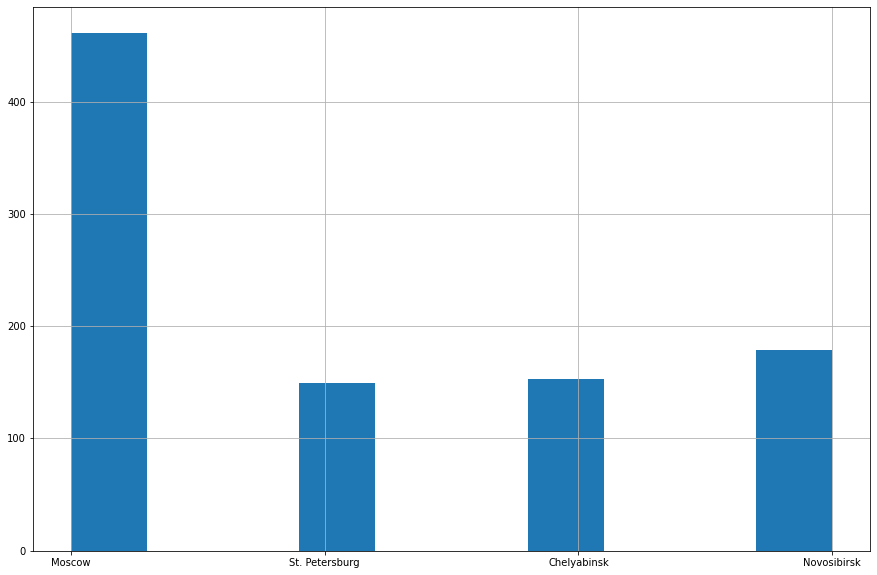

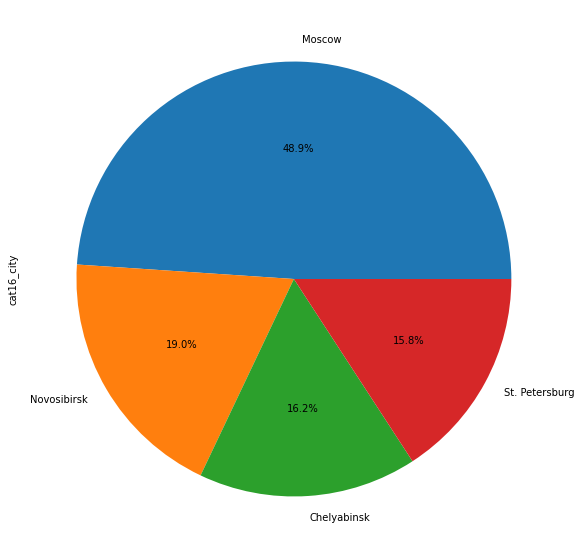

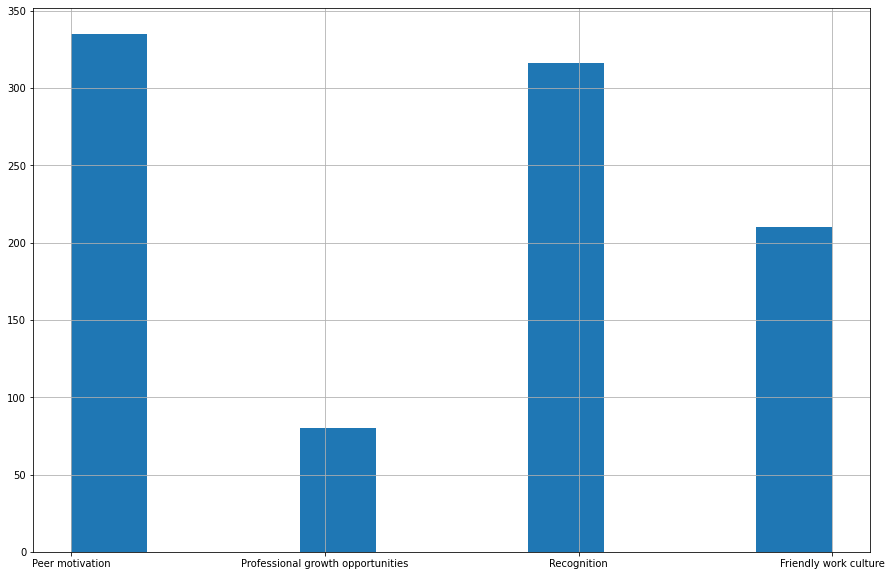

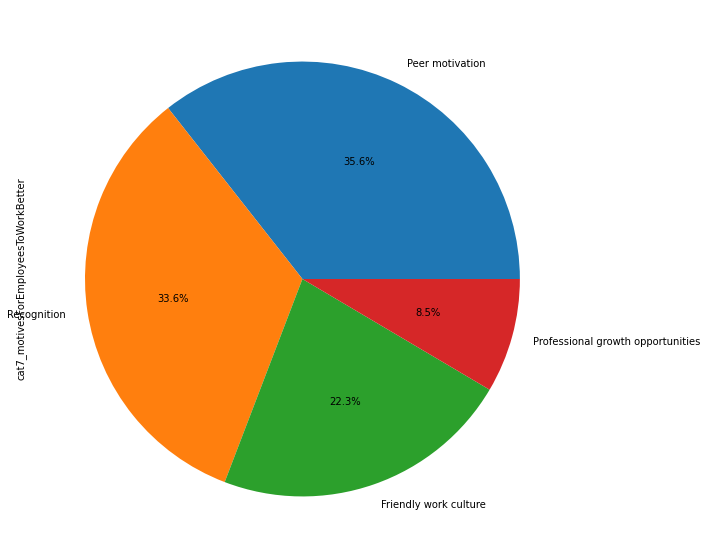

In [8]:
# cat16_city visualisation(Qualitative variable)
qualitative_features = 'cat16_city', 'cat7_motivesForEmployeesToWorkBetter'
quantitative_features = 'num1_12', 'num2_12', 'num3_12'

# Вывод и нормализация quantitative_features
sns.displot(data=data['num1_12'], kde=True)
sns.boxplot(y=data['num2_12'])

sns.displot(data=data['num2_12'], kde=True)
sns.boxplot(y=data['num2_12'])

data['num3_12'] = data['num3_12'].replace(
    {'-': np.nan,
     ' ': np.nan}
)

sns.displot(data=data['num3_12'], kde=True)
sns.boxplot(y=data['num3_12'])
# Вывод и нормализация qualitative_features

for some in qualitative_features:
    plt.figure(figsize=(15,10))
    data[some].hist()
    plt.figure(figsize=(15, 10))
    data[some].value_counts().plot.pie(autopct='%1.1f%%')
data.info()

c:\users\4702306\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\users\4702306\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
c:\users\4702306\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\4702306\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\stats.py:3291: RuntimeWarning: Mean of empty slice.
  c_mean = c.mean()
c:\users\4702306\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\4702306\appdata\local\programs\pytho

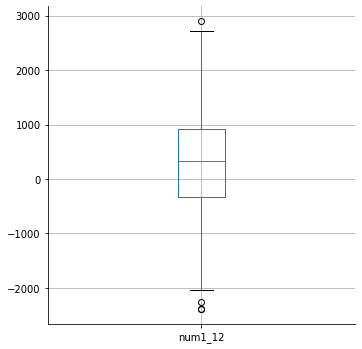

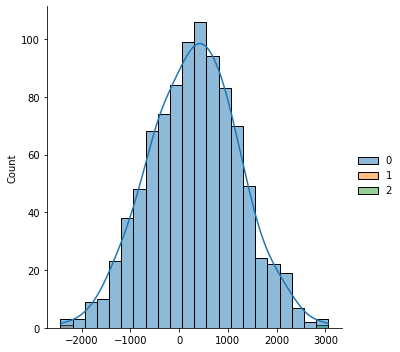

In [9]:
# Задание 3

from scipy.stats import sigmaclip

c1, low, upp = sigmaclip(data['num2_12'], 3.0, 3.0)
sns.displot(data=c1, kde=True)

Q1 = np.nanquantile(data[usecols[2]], 0.25)
Q3 = np.nanquantile(data[usecols[2]], 0.75)
IQR = Q3 - Q1
data.query("@Q1 - 1.5*@IQR < num1_12 < @Q3 + 1.5*@IQR")\
    .boxplot(column=usecols[2])
c = sigmaclip(data['num1_12'], 3.0, 3.0)
sns.displot(data=c, kde=True)

In [10]:
#city = data.cat16_city.mode()
#data.cat16_city = data.cat16_city.fillna(city[0])
#data.cat16_city.isnull().any()

In [11]:
# Заполнение самым популярным значением
data.info()
datasett = Counter(data['cat16_city'].dropna())
mode = datasett.most_common(1)[0][0]
data['cat16_city'].fillna(mode, inplace=True)
data['cat16_city'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   cat7_motivesForEmployeesToWorkBetter  941 non-null    object 
 1   cat16_city                            942 non-null    object 
 2   num1_12                               1000 non-null   float64
 3   num2_12                               952 non-null    float64
 4   num3_12                               913 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


array(['Moscow', 'St. Petersburg', 'Chelyabinsk', 'Novosibirsk'],
      dtype=object)

In [12]:
data['num1_12'].fillna(np.mean(data['num1_12'].dropna()), inplace=True)
data['num1_12']

0      -837.687526
1      1336.388455
2       869.103465
3        65.909935
4      1632.011092
          ...     
995     200.579400
996    1089.812971
997    -917.827798
998    -515.523984
999    -283.559812
Name: num1_12, Length: 1000, dtype: float64

In [13]:
data['num2_12'].fillna(np.mean(data['num2_12'].dropna()), inplace=True)
data['num2_12']

0       844.805675
1       215.923522
2       706.463138
3       444.392061
4      1208.682281
          ...     
995     500.486928
996     620.717385
997     441.356635
998    1045.942245
999     706.237384
Name: num2_12, Length: 1000, dtype: float64

In [14]:
data['num3_12'].fillna(np.mean(data['num3_12'].dropna()), inplace=True)
data['num3_12']

0      380.964354
1      323.691942
2      239.490844
3      265.519349
4      279.955993
          ...    
995    381.730768
996    369.892088
997    327.034143
998    391.061667
999    364.701805
Name: num3_12, Length: 1000, dtype: float64

In [15]:
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
data['cat7_motivesForEmployeesToWorkBetter'] = data['cat7_motivesForEmployeesToWorkBetter'].replace(np.nan, ' ')
onehot_encoder.fit(data[['cat7_motivesForEmployeesToWorkBetter']])
data['cat7_motivesForEmployeesToWorkBetter'] = onehot_encoder.inverse_transform(X.iloc[:, :3])
data.cat1_gender.isnull().any()

NameError: name 'X' is not defined

In [ ]:
#Заполнение методом ближайших соседей(KNN)
knn_imputer = KNNImputer()
enc = OneHotEncoder()
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(data[['num3_12']])
data[['num3_12_scaled']] = scaled_values

dataset_copy = data.copy()
inputed_df = knn_imputer.fit_transform(dataset_copy[['num3_12_scaled']])
data['num3_12_scaled'] = inputed_df[:, 0]
data['num3_12_scaled']


In [ ]:
def replace_max(array):
  val = max(array)
  for i in range(len(array)):
    if (array[i] != val):
      array[i] = 0
    else:
      array[i] = 1
  array = np.append(array, 0)
  return array

data['cat16_city'] = data['cat16_city'].replace(np.nan, ' ')


enc_dataset = pd.DataFrame(enc.fit_transform(data[['cat16_city']]).toarray(), columns=data['cat16_city'].unique())
idx = enc_dataset.groupby([np.nan]).indices[1]
enc_dataset['Moscow'] = pd.DataFrame(np.where(enc_dataset['Moscow'].index.isin(idx), np.nan, enc_dataset['Moscow']))
enc_dataset['St. petersburg'] = pd.DataFrame(np.where(enc_dataset['St. petersburg'].index.isin(idx), np.nan, enc_dataset['St. petersburg']))
enc_dataset['Chelyabinsk'] = pd.DataFrame(np.where(enc_dataset['Chelyabinsk'].index.isin(idx), np.nan, enc_dataset['Chelyabinsk']))
enc_dataset['Novosibirsk'] = pd.DataFrame(np.where(enc_dataset['Novosibirsk'].index.isin(idx), np.nan, enc_dataset['Novosibirsk']))
enc_dataset = enc_dataset.drop(columns=[np.nan])
imputed_dataset = knn_imputer.fit_transform(enc_dataset)

imputed_dataset = np.apply_along_axis(replace_max, 1, imputed_dataset)

restored_data = enc.inverse_transform(imputed_dataset)
data['cat16_city'] = restored_data
data['cat16_city']

In [ ]:
# Задание 5
data.num1_12 = preprocessing.normalize([data.num1_12])[0]
data.num2_12 = preprocessing.normalize([data.num2_12])[0]
data.num3_12 = preprocessing.scale(data.num3_12)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
city = pd.Series(label_encoder.fit_transform(data['cat16_city']))
city.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))